In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')  # enable import from src/

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt

import numpy as np
import torch
import pickle
import pandas as pd
from src.problem import Instance

In [3]:
with open('../gbmooeqh_preds_val.pkl', 'rb') as f:
    preds = pickle.load(f)

df = pd.DataFrame(preds)
# df['x_hat'] = df['x_hat'].map(lambda t: t.numpy())
df['conf'] = df['x_hat'].map(lambda x: np.where(x > 1-x, x, 1-x))

df.head()

,fp,size,x_hat,vars_names,conf
0,data/raw/125_20_14.json,20,"[0.12782937424532267, 0.1530633232990991, 0.15...","[x(0,0), x(0,1), x(0,2), x(0,3), x(0,4), x(0,5...","[0.8721706257546773, 0.8469366767009009, 0.840..."
1,data/raw/125_24_0.json,24,"[0.5325511384219891, 0.5410226559136068, 0.543...","[x(0,0), x(0,1), x(0,2), x(0,3), x(0,4), x(0,5...","[0.5325511384219891, 0.5410226559136068, 0.543..."
2,data/raw/125_22_19.json,22,"[0.28098524360349153, 0.277798527385169, 0.272...","[x(0,0), x(0,1), x(0,2), x(0,3), x(0,4), x(0,5...","[0.7190147563965085, 0.7222014726148309, 0.727..."
3,data/raw/125_20_19.json,20,"[0.19040267160698462, 0.19943242390299537, 0.6...","[x(0,0), x(0,1), x(0,2), x(0,3), x(0,4), x(0,5...","[0.8095973283930153, 0.8005675760970046, 0.692..."
4,data/raw/125_22_11.json,22,"[0.19969897911360895, 0.21524976411100422, 0.2...","[x(0,0), x(0,1), x(0,2), x(0,3), x(0,4), x(0,5...","[0.800301020886391, 0.7847502358889957, 0.7714..."


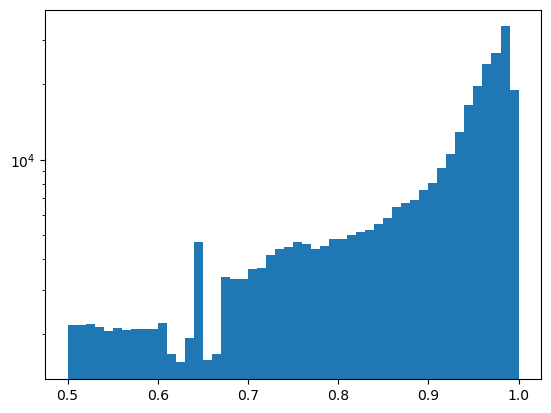

In [4]:
all_confs = np.hstack(df['conf'].values)

plt.hist(all_confs, bins=50)
plt.yscale('log')
plt.show()